In [69]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')
from stargazer.stargazer import Stargazer, LineLocation

from experimentation import data_preparation, regression_OLS, full_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
df1 = full_df(file_location = "uk_data.csv", lags = 5)
df2 = data_preparation(file_location = "uk_data.csv", lags = 5, splits = 5, train_share = 0.8)

In [9]:
df1.head()

,gdp,retail_sales,wage_growth,gdp_lag1,retail_sales_lag1,wage_growth_lag1,gdp_lag2,retail_sales_lag2,wage_growth_lag2,gdp_lag3,retail_sales_lag3,wage_growth_lag3,gdp_lag4,retail_sales_lag4,wage_growth_lag4,gdp_lag5,retail_sales_lag5,wage_growth_lag5
date,,,,,,,,,,,,,,,,,,
2008-10-31,-0.235849,-0.977654,0.459770,-1.165501,0.561798,0.000000,-0.348432,0.000000,0.230415,-0.577367,0.281690,0.230947,-0.115340,-2.739726,-0.230415,-0.914286,3.546099,0.462963
2008-11-30,-1.418440,0.282087,-0.228833,-0.235849,-0.977654,0.459770,-1.165501,0.561798,0.000000,-0.348432,0.000000,0.230415,-0.577367,0.281690,0.230947,-0.115340,-2.739726,-0.230415
2008-12-31,-0.239808,-0.843882,0.000000,-1.418440,0.282087,-0.228833,-0.235849,-0.977654,0.459770,-1.165501,0.561798,0.000000,-0.348432,0.000000,0.230415,-0.577367,0.281690,0.230947
2009-01-31,-0.961538,0.992908,-3.440367,-0.239808,-0.843882,0.000000,-1.418440,0.282087,-0.228833,-0.235849,-0.977654,0.459770,-1.165501,0.561798,0.000000,-0.348432,0.000000,0.230415
2009-02-28,-0.121359,-0.842697,-2.850356,-0.961538,0.992908,-3.440367,-0.239808,-0.843882,0.000000,-1.418440,0.282087,-0.228833,-0.235849,-0.977654,0.459770,-1.165501,0.561798,0.000000


In [25]:
len(df2["split_1"]["split_1_train"].columns)

18

In [28]:
abc = pd.DataFrame()
len(abc.columns)

0

In [63]:
df = regression_OLS(file_location = "uk_data.csv", splits = 3, lags = 2, train_share = 0.9, p_cutoff = 0.05)

#####################
split_1
#####################
Full sample columns
Index(['gdp', 'wage_growth', 'gdp_lag1', 'wage_growth_lag1', 'gdp_lag2',
       'wage_growth_lag2'],
      dtype='object')
Split columns
Index(['wage_growth_lag1', 'wage_growth_lag2'], dtype='object')
#####################
split_2
#####################
Full sample columns
Index(['const', 'gdp', 'wage_growth', 'gdp_lag1', 'wage_growth_lag1',
       'gdp_lag2', 'wage_growth_lag2'],
      dtype='object')
Split columns
Index(['const'], dtype='object')
#####################
split_3
#####################
Full sample columns
Index(['gdp', 'wage_growth', 'gdp_lag1', 'wage_growth_lag1', 'gdp_lag2',
       'wage_growth_lag2'],
      dtype='object')
Split columns
Index(['gdp_lag1'], dtype='object')


In [56]:
df[0]

,Sample 1,Sample 2,Sample 3
R2,-0.0168,-0.0977,-0.4114
Mae,0.3191,0.2749,0.3594
Mse,0.1567,0.1096,0.2035
Rmse,0.3958,0.3311,0.4511
Start Date,30/06/2010,31/07/2016,31/08/2022
End Date,31/01/2011,28/02/2017,31/03/2023


<AxesSubplot:xlabel='date'>

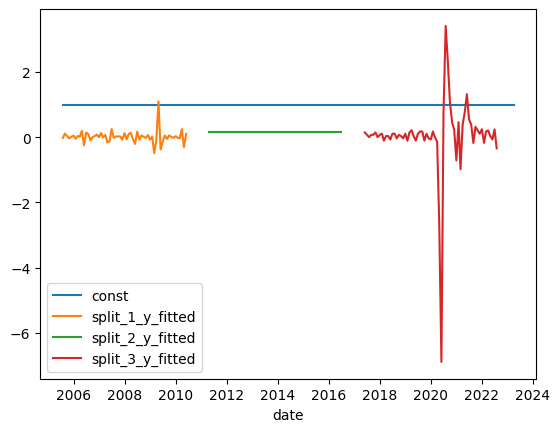

In [58]:
df[1].plot()

In [59]:
df[2]

In [70]:
df[3]

,const,split_1_y_fitted,split_2_y_fitted,split_3_y_fitted,y_fitted_ave,y
date,,,,,,
2005-07-31,1.0,-0.024390,0.164948,0.216851,0.119136,1.0
2005-08-31,1.0,0.112336,0.164948,0.129313,0.135532,1.0
2005-09-30,1.0,0.038479,0.164948,0.000000,0.067809,1.0
2005-10-31,1.0,-0.035542,0.164948,0.214731,0.114712,1.0
2005-11-30,1.0,0.012820,0.164948,-0.128056,0.016571,1.0
...,...,...,...,...,...,...
2022-11-30,1.0,0.084700,0.164948,0.207665,0.152437,1.0
2022-12-31,1.0,-0.006236,0.164948,0.034407,0.064373,1.0
2023-01-31,1.0,0.023567,0.164948,-0.103121,0.028464,1.0


In [5]:
print(df[0])
print(df[1])
df[2]
print(df[3])


+------------------------------------------------------+
| *** OUT OF SAMPLE PERFORMANCE ACROSS SUB-PERIODS *** |
+-----------------+-----------------+------------------+
|                 |        Sample 1 |         Sample 2 |
+-----------------+-----------------+------------------+
| R2              |         -1.3301 |          -0.6487 |
| Mae             |          0.3605 |           0.4837 |
| Mse             |          0.1646 |           0.4086 |
| Rmse            |          0.4057 |           0.6392 |
| Start Date      |      30/04/2013 |       31/05/2022 |
| End Date        |      28/02/2014 |       31/03/2023 |
+-----------------+-----------------+------------------+
                   y  split_1_y_fitted  split_2_y_fitted
date                                                    
2005-01-31  0.876095               NaN               NaN
2005-02-28  0.000000               NaN               NaN
2005-03-31 -0.372208         -0.340843               NaN
2005-04-30  1.245330          0

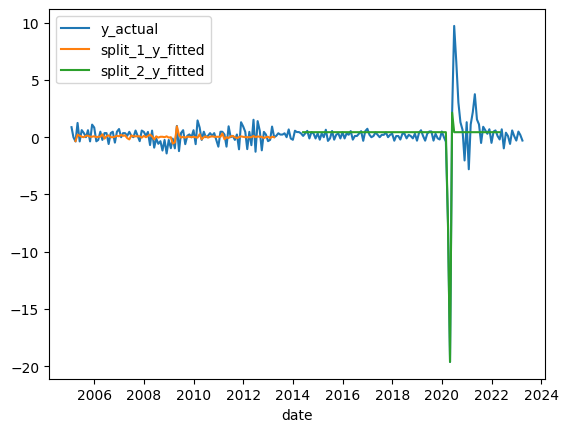

In [10]:

df[3].plot();
